In [ ]:
# !pip install folium
# !pip install geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium import plugins

In [2]:
pd.set_option('display.max_columns', None)
weather_data = pd.read_csv("Preprocessing completed-Australian Rainfall.csv")
weather_data.head(5)

,Location,State/Province,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,New South Wales,-36.0737,146.9135,13.4,22.9,0.6,11.0,5.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,No,0
1,Albury,New South Wales,-36.0737,146.9135,7.4,25.1,0.0,2.7,10.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,8.0,4.0,17.2,24.3,No,0
2,Albury,New South Wales,-36.0737,146.9135,17.5,32.3,1.0,0.9,8.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,New South Wales,-36.0737,146.9135,14.6,29.7,0.2,1.1,5.8,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,8.0,7.0,20.6,28.9,No,0
4,Albury,New South Wales,-36.0737,146.9135,7.7,26.7,0.0,2.1,11.5,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,6.0,2.0,16.3,25.5,No,0


In [ ]:
# weather_data.columns

In [ ]:
# weather_data.isnull().sum()

## Correlation - the dependency between numerical values

In [3]:
columns_to_exclude = ['Location','State/Province','WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm','RainTomorrow','RainToday']
len(columns_to_exclude)
selected_columns = [col for col in weather_data.columns if col not in columns_to_exclude]
numeric_df = weather_data[selected_columns]

In [4]:
correlation_matrix = numeric_df.corr(numeric_only=True)
correlation_matrix

def color_negative_red(val):
    color = 'red' if val > 0.7 else 'black'
    return 'color: %s' % color

correlation_matrix.style.applymap(color_negative_red)

,Latitude,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
Latitude,1.000000,-0.093742,0.525298,0.459345,0.075983,0.156064,0.100159,-0.054500,0.044812,0.047328,-0.199922,-0.064336,-0.125973,-0.196014,0.567262,0.470173
Longitude,-0.093742,1.000000,0.021210,-0.096715,0.026059,-0.048274,-0.078631,-0.018506,-0.009068,0.041786,0.120521,0.147120,0.029162,0.027448,-0.043676,-0.095623
MinTemp,0.525298,0.021210,1.000000,0.731385,0.111395,0.298113,0.045262,0.197776,0.205542,0.173511,-0.249142,0.019672,-0.454002,-0.464720,0.903277,0.706255
MaxTemp,0.459345,-0.096715,0.731385,1.000000,-0.070303,0.380550,0.273739,0.092379,0.036361,0.043868,-0.525702,-0.499793,-0.331568,-0.424880,0.882853,0.984687
Rainfall,0.075983,0.026059,0.111395,-0.070303,1.000000,-0.033306,-0.140299,0.133391,0.090535,0.067054,0.224926,0.257235,-0.170624,-0.130337,0.016506,-0.075195
Evaporation,0.156064,-0.048274,0.298113,0.380550,-0.033306,1.000000,0.174203,0.124448,0.118165,0.073043,-0.320851,-0.252018,-0.166266,-0.182001,0.351333,0.370506
Sunshine,0.100159,-0.078631,0.045262,0.273739,-0.140299,0.174203,1.000000,-0.019181,0.005201,0.027500,-0.286133,-0.361988,0.029289,-0.004897,0.173757,0.286334
WindGustSpeed,-0.054500,-0.018506,0.197776,0.092379,0.133391,0.124448,-0.019181,1.000000,0.603203,0.690070,-0.224356,-0.037936,-0.459477,-0.416072,0.169608,0.052149
WindSpeed9am,0.044812,-0.009068,0.205542,0.036361,0.090535,0.118165,0.005201,0.603203,1.000000,0.512572,-0.273522,-0.030248,-0.231844,-0.181641,0.151107,0.019537
WindSpeed3pm,0.047328,0.041786,0.173511,0.043868,0.067054,0.073043,0.027500,0.690070,0.512572,1.000000,-0.133218,0.031956,-0.299938,-0.261114,0.159948,0.017057


# To measure the dependency between a categorical variable and a numerical variable, we may use varoius methods:
1. **ANOVA (Analysis of Variance)**-  for differences in means between multiple groups of a categorical variable with respect to a numerical variable.
It assesses whether there is a statistically significant difference in the means of the numerical variable across the different categories.
However, ANOVA assumes that the numerical variable follows a normal distribution within each group. 

2. **Kruskal-Wallis Test**: is a non-parametric test that can be used when the assumption of normality is violated (is suitable when the numerical variable is not normally distributed).
It tests whether the median of the numerical variable differs significantly across the categories of the categorical variable.

4. **Mann-Whitney U Test** (Wilcoxon rank-sum test): non-parametric test,  assesses whether there are significant differences in the distribution of the numerical variable between the two groups defined by the binary categorical variable. This test however does not provide information about the direction or magnitude of the difference between the two groups. It only assesses whether there is a significant difference in the distributions.
                                                                                                                
3. **Point-Biserial Correlation / Biserial Correlation**: it is a measure of association between a binary (dichotomous - 2 groups only) variable and a continuous variable. It is similar to the standard Pearson correlation. This correlation coefficient measures the strenght and direction of the <u>linear relationship</u> between variables.It ranges from -1 to 1, where -1 and 1 indicates perfect linear relationship, 0 no linear relationship. 

There are also other options but those are the most popular.  
                                                                                                                
I decided to try both Point-Biserial Correlation and Mann-Whitney U Test. The second one, I also wanted to complete with the plots (violin plots and swarm plot) but swarm plot did not load (probably too much data) and because of it, the differences in the distributions we will see only on violin plot. 

## Point-Biserial Correlation 

In [5]:
from scipy.stats import pointbiserialr

def point_biserial(binary_variable,continuous_variable):
    correlation_coefficient, p_value = pointbiserialr(binary_variable, continuous_variable)

#     print("Point-Biserial Correlation:")
    print("Correlation Coefficient:", correlation_coefficient)
    print("P-value:", p_value,"\n")

In [ ]:
# numeric_df.head(5)

In [6]:
# the correlation coef -> [-1,1], ~ -1,1 strong association, ~ 0 weak
# p-value - measure of the statistical significance of the correlation coef. It represents the probability of obtaining 
# the observed correlation coef by chance (typically 5%). If p-value < 0.05 correlation coef is statistically significant
# and the observed association is unlikely to be due to random chance.

print("Point-Biserial Correlation between RainTomorrow and other numerical variables\n")
for num in numeric_df: 
    print(num)
    point_biserial(weather_data['RainTomorrow'],numeric_df[num])
# all p-values <0.05 -> correlation coefs are statistically significant
# coef: rather they indicate weak association, some of them are positive some negative

Point-Biserial Correlation between RainTomorrow and other numerical variables

Latitude
Correlation Coefficient: -0.02099344653492987
P-value: 1.2180728848030099e-09 

Longitude
Correlation Coefficient: 0.015722924884783274
P-value: 5.32017840215221e-06 

MinTemp
Correlation Coefficient: 0.08953857987067163
P-value: 1.0321690284373713e-148 

MaxTemp
Correlation Coefficient: -0.1609207915695236
P-value: 0.0 

Rainfall
Correlation Coefficient: 0.2387237732977852
P-value: 0.0 

Evaporation
Correlation Coefficient: -0.0762654780491994
P-value: 2.5601989425312542e-108 

Sunshine
Correlation Coefficient: -0.26476107675019933
P-value: 0.0 

WindGustSpeed
Correlation Coefficient: 0.23618824657937193
P-value: 0.0 

WindSpeed9am
Correlation Coefficient: 0.09506587144856439
P-value: 1.823314033428571e-167 

WindSpeed3pm
Correlation Coefficient: 0.09576553986056144
P-value: 6.393803884345071e-170 

Humidity9am
Correlation Coefficient: 0.26008152112763244
P-value: 0.0 

Humidity3pm
Correlation Coef

In [ ]:
# weather_data_preprocessed.info()

## Mann-Whitney U Test

Procedure: 

    1. H_0 - there is no difference in the distribution of the numerical variable between the two groups defined by the categorical variable 
    2. H_1 - there is a significant difference -|| - 
    3. Rank the data: 
        - order the numerical variable from the lowest to highest 
        - assign ranks to the data points starting from 1 for the lowest value and increasing by 1 for each subsequent value
        - ties (repeated values) receive the average rank of the tied ranks. ( example 1.5 1.5 3 4 5 ) 
    4. Calculate the U-statistic (there are formulas for small and large number of samples) and p-value
    5. Interpretation: if p-value < 0.05 reject the null hypothesis, if >= 0.05 fail to reject H_0

In [7]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(categorical_variable,numerical_variable):
    statistic, p_value = mannwhitneyu(numerical_variable[categorical_variable == 1],
                                  numerical_variable[categorical_variable == 0])

    alpha = 0.05
    print("U-statistic:", statistic)
    print("P-value:", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis. There are significant differences between the groups.\n")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference between the groups.\n")

In [8]:
print("The Mann-Whitney U test between RainTomorrow and other numerical variables\n")
for num in numeric_df: 
    print(num)
    mann_whitney_u_test(weather_data['RainTomorrow'],numeric_df[num])

# In summary, for all the numerical variables tested, the Mann-Whitney U test rejects the null hypothesis 
# and indicates that there are significant differences in the distributions of each numerical variable between RainTomorrow groups

The Mann-Whitney U test between RainTomorrow and other numerical variables

Latitude
U-statistic: 565689808.0
P-value: 2.6779878087885306e-35
Reject the null hypothesis. There are significant differences between the groups.

Longitude
U-statistic: 623169944.0
P-value: 1.0321251685671835e-13
Reject the null hypothesis. There are significant differences between the groups.

MinTemp
U-statistic: 669195440.0
P-value: 3.308096783412043e-120
Reject the null hypothesis. There are significant differences between the groups.

MaxTemp
U-statistic: 467350221.5
P-value: 0.0
Reject the null hypothesis. There are significant differences between the groups.

Rainfall
U-statistic: 843408324.0
P-value: 0.0
Reject the null hypothesis. There are significant differences between the groups.

Evaporation
U-statistic: 529490596.5
P-value: 1.0811984805761728e-136
Reject the null hypothesis. There are significant differences between the groups.

Sunshine
U-statistic: 386433413.5
P-value: 0.0
Reject the null hy

## Violin plot
It is a hybrid of a box plot and a kernel density plot. It shows the distribution of numerical data. 

Components: 

    - the white dot - median
    - the box plot in the middle
    - the thick grey bar in the center - interquartile range (50% of observations -> Q3-Q1)
    - kernel density plot on the both sides of the violin - shows the probability density of data points at different values
    width = freqency; the wider range, the more frequent value (higher probability)
    - outliers - data points that fall outside the whiskers of the box plot
    
From the violin plot, we can find out for example how many values clustered around the median, min, max or we may compare the medians for different categories.

If the plot is extremely skinny on each end and wide in the middle -> observations are mainly concentrated around the median.

For many categories we can swap the axes (horizontal violin).

In [ ]:
# sns.set(style="whitegrid", palette="pastel", color_codes=True)
# sns.violinplot(x="feed", y="weight", hue="sex", data=df,
#                palette={"male": "b", "female": "y"})
# plt.legend(loc='upper left')
# https://mode.com/blog/violin-plot-examples/

In [9]:
def violin_plot(df,categorical_variable,numerical_variable):
    custom_palette = ["#DBDFEA", "#8294C4"]
    sns.violinplot(x=categorical_variable, y=numerical_variable, data=df,palette=custom_palette)
    sns.despine(left=True)

#     plt.title("Violin Plot",fontweight='bold')
    plt.xlabel(categorical_variable)
    plt.ylabel(numerical_variable)
    plt.grid(axis='y', linestyle='-', alpha=0.3)
    plt.show()

In [ ]:
# for col in numeric_df.columns:
#     violin_plot(weather_data,'RainTomorrow',col)
#observations: mostly values are concentrated around the median,in some variables there are distincive outliers like in rainfall or evaporation

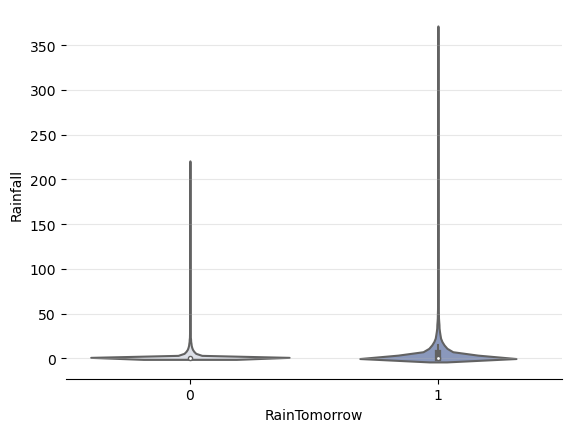

In [10]:
violin_plot(weather_data,'RainTomorrow','Rainfall')

In [ ]:
#sns.swarmplot(x='categorical_var', y='numerical_var', data=data)

## The dependency between RainTomorrow and other categorical variables

### The chi-square test - categorical vs. categorical variable
The Chi-square test is used to determine if there is a significant association between two categorical variables. 
Process for conducting a Chi-square test:
1. Formulate the null and alternative hypotheses:
Null hypothesis: There is no association between the two categorical variables.
Alternative hypothesis: There is a significant association - || - 
2. Set the significance level (alpha): Choose a significance level (commonly 0.05) that represents the threshold for determining statistical significance. The significance level determines how strong the evidence against the null hypothesis must be before we reject it.
3. Create a contingency table (cross-tabulation)- a table that shows the observed frequencies for each combination of the two categorical variables.
4. Compute the Chi-square test statistic - you calculate the difference between the observed and expected frequencies and then you sum up them.
5. Find p-value
6. Comparison: If the p-value is < 0.05, reject the null hypothesis - there is a significant association between the variables. If The p-value >= 0.05 reject alternative hypothesis - there is no significant association.
7. Chi-square statistic: The bigger difference, the stronger association between the variables. When the test statistic is large, it suggests that there is a significant discrepancy between the observed and expected frequencies, indicating that the variables are dependent.

#### I added also Cramer's V, which is an extension of the chi-square test and provides a standardized measure of association.
Cramer's V ranges from 0 to 1, where 0 indicates no association between the categorical variables, and 1 indicates a perfect association. The formula for Cramer's V is:

$$
V = \sqrt{\frac{\chi^2}{(n \cdot min (k-1,r-1)}}
$$

Where:

$\chi^2$  is the chi-square statistic obtained from the chi-square test of independence between the two categorical variables.

n is the total number of observations in the contingency table.

k is the number of rows in the contingency table.

r is the number of columns in the contingency table.

In [11]:
from scipy.stats import chi2_contingency
def chi_square_test(categorical_var_1, categorical_var_2):
    crosstab = pd.crosstab(categorical_var_1, categorical_var_2)
    chi2, p, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    # crosstab.sum() - the sum of elements along each column of the contingency table
    # crosstab.sum().sum() - the sum of all elements in the 1-dimensional array obtained from the previous step
    num_rows = crosstab.shape[0]
    num_cols = crosstab.shape[1]
    cramer_v = np.sqrt(chi2 / (n * min(num_rows - 1, num_cols - 1)))
    return chi2, p, cramer_v

def chi_square_contigency(tab_x, tab_x_str, var,sort=1):
    df = pd.DataFrame(columns=['Variable', 'Chi-square', 'P-value',"Cramer's V"])
    for x, x_str in zip(tab_x, tab_x_str):
        chi2, p, cramer_v = chi_square_test(var, x)
        result = pd.DataFrame({'Variable': [x_str], 'Chi-square': [round(chi2,2)], 'P-value': [p], "Cramer's V":[round(cramer_v,2)]})
        df = pd.concat([df, result], ignore_index=True)
        if sort:
            df = df.sort_values("Cramer's V",ascending=False)
    return df


In [12]:
# Problem 1) Cloud's type is by default float, so I need to change it:
cloud_categories = {
    0: 'Clear',
    1: 'Few Clouds',
    2: 'Partly Cloudy',
    3: 'Mostly Cloudy',
    4: 'Cloudy',
    5: 'Overcast',
    6: 'Obscured',
    7: 'Mostly Obscured',
    8: 'Completely Overcast',
    9: 'Sky Obscured'
}

cloud_9am = weather_data['Cloud9am'].map(cloud_categories).astype('category')
cloud_3pm =  weather_data['Cloud3pm'].map(cloud_categories).astype('category')

#other categorical variables
location = weather_data['Location']
state = weather_data['State/Province']
wind_gust = weather_data['WindGustDir']
wind_9am = weather_data['WindDir9am']
wind_3pm = weather_data['WindDir3pm']
rain_today = weather_data['RainToday']

# 'RainTomorrow' - 0 if will be raining 1 if not - change to an object
rain_tomorrow = weather_data['RainTomorrow'].map({0:'No',1:'Yes'})

categorical_tab = np.array([location,state,wind_gust,wind_9am,wind_3pm,cloud_9am,cloud_3pm,rain_today,rain_tomorrow])
categorical_tab_str = np.array(['location','state','wind_gust','wind_9am','wind_3pm','cloud_9am','cloud_3pm','rain_today','rain_tomorrow'])

In [ ]:
#"correlation does not imply causation". It means that just because two variables show a statistical relationship (correlation) does not necessarily mean that one variable causes the other to change.
# pd.set_option('display.max_columns', None)
# pd.crosstab(cloud_3pm,rain_tomorrow)
# pd.crosstab(cloud_9am,rain_tomorrow)
# pd.crosstab(rain_tomorrow,location)
# pd.crosstab(rain_tomorrow,state)
# pd.crosstab(rain_tomorrow,wind_gust)
# pd.crosstab(rain_tomorrow,wind_9am)
# pd.crosstab(rain_tomorrow,wind_3pm)
# pd.crosstab(rain_tomorrow,rain_today)

In [13]:
chi_square_test(rain_tomorrow, state)

(369.39154870450295, 6.54541365977893e-75, 0.06639247778719443)

In [14]:
chi_square_contigency(categorical_tab,categorical_tab_str,rain_tomorrow,0)
chi_square_contigency(categorical_tab,categorical_tab_str,rain_tomorrow)

,Variable,Chi-square,P-value,Cramer's V
8,rain_tomorrow,83795.16,0.000000e+00,1.00
0,rain_today,8275.09,0.000000e+00,0.31
1,cloud_3pm,5666.40,0.000000e+00,0.26
2,cloud_9am,3848.43,0.000000e+00,0.21
3,location,2256.69,0.000000e+00,0.16
4,wind_9am,1208.31,2.680704e-248,0.12
5,wind_gust,958.23,1.200029e-194,0.11
6,wind_3pm,853.16,3.703481e-172,0.10
7,state,369.39,6.545414e-75,0.07


**In summary**
The large chi-squares and small p-values (close to 0) indicate strong evidence against the null hypothesis and prove that there is a significant association between rain_tomorrow and other variables. Moreover,The strength of association varies, with some variables exhibiting stronger associations (Cramer's V closer to 1) and others having weaker associations (Cramer's V closer to 0). 

## How are the other categorical variables related to each other?

In [15]:
cramers_v_table = pd.DataFrame()
for index, col in enumerate(categorical_tab):
    cramers_v_table[index]=chi_square_contigency(categorical_tab,categorical_tab_str,col,0)["Cramer's V"]
cramers_v_table

,0,1,2,3,4,5,6,7,8
0,1.00,1.00,0.20,0.20,0.19,0.13,0.12,0.16,0.16
1,1.00,1.00,0.19,0.16,0.19,0.07,0.07,0.06,0.07
2,0.20,0.19,1.00,0.23,0.35,0.03,0.04,0.15,0.11
3,0.20,0.16,0.23,1.00,0.19,0.04,0.04,0.19,0.12
4,0.19,0.19,0.35,0.19,1.00,0.03,0.03,0.14,0.10
5,0.13,0.07,0.03,0.04,0.03,1.00,0.17,0.21,0.21
6,0.12,0.07,0.04,0.04,0.03,0.17,1.00,0.18,0.26
7,0.16,0.06,0.15,0.19,0.14,0.21,0.18,1.00,0.31
8,0.16,0.07,0.11,0.12,0.10,0.21,0.26,0.31,1.00


In [16]:
keys = np.arange(9)
values = categorical_tab_str
new_names = {}
for i in range(len(keys)):
    new_names[keys[i]]=values[i]
# new_names

In [17]:
cramers_v_table.rename(columns=new_names, inplace=True)
cramers_v_table.rename(index=new_names, inplace=True)
cramers_v_table

def color_negative_red(val):
    color = 'red' if val > 0.5 else 'black'
    return 'color: %s' % color

cramers_v_table.style.applymap(color_negative_red)

,location,state,wind_gust,wind_9am,wind_3pm,cloud_9am,cloud_3pm,rain_today,rain_tomorrow
location,1.000000,1.000000,0.200000,0.200000,0.190000,0.130000,0.120000,0.160000,0.160000
state,1.000000,1.000000,0.190000,0.160000,0.190000,0.070000,0.070000,0.060000,0.070000
wind_gust,0.200000,0.190000,1.000000,0.230000,0.350000,0.030000,0.040000,0.150000,0.110000
wind_9am,0.200000,0.160000,0.230000,1.000000,0.190000,0.040000,0.040000,0.190000,0.120000
wind_3pm,0.190000,0.190000,0.350000,0.190000,1.000000,0.030000,0.030000,0.140000,0.100000
cloud_9am,0.130000,0.070000,0.030000,0.040000,0.030000,1.000000,0.170000,0.210000,0.210000
cloud_3pm,0.120000,0.070000,0.040000,0.040000,0.030000,0.170000,1.000000,0.180000,0.260000
rain_today,0.160000,0.060000,0.150000,0.190000,0.140000,0.210000,0.180000,1.000000,0.310000
rain_tomorrow,0.160000,0.070000,0.110000,0.120000,0.100000,0.210000,0.260000,0.310000,1.000000


In [ ]:
#print("\033[31mI did not know \033[32;1mthat I can so much change the style \033[33mof the text \033[0min python")

In [ ]:
# https://colorhunt.co/palettes/vintage

## Plots 2D  
Ideas: 

    1. Map (json file) with points (long,lat) - heatmap,how many points are concentrated in certain areas 
    2. Identification of regional weather patterns: on the map, heatmap with variables like rainfall,windspeedn,pressure 
    3. Avg min/max temp for specific locations + Avg temp9am/temp3pm
    
Facts:

    1. the lower humidity, the higher evaporation 
    2. when sunshine increases, it generally leads to an increase in evaporation.
    The relationship in a nutshell: 
    More Sunshine → Higher Surface Temperature → Increased Kinetic Energy of Water Molecules → Enhanced Evaporation

## Maps - density of observations

In [18]:
m = folium.Map(location=[-26.4390917,133.281323],zoom_start=4)
folium.TileLayer('OpenStreetMap').add_to(m)
# folium.TileLayer('Stamen Water color').add_to(m)
# folium.TileLayer('cartodbpositron').add_to(m)
# folium.TileLayer('CartoDB Positron').add_to(m)

plugins.HeatMap(
    weather_data[['Latitude','Longitude']],
    name='Heatmap'
).add_to(m)

m

## Heatmap on the map

In [19]:
shape = gpd.read_file("Shapefiles\STE_2021_AUST_GDA2020.shp")
# shape

In [20]:
shape.shape

(10, 9)

In [21]:
sorted(shape['STE_NAME21'].unique())

['Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Other Territories',
 'Outside Australia',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia']

In [22]:
sorted(weather_data['State/Province'].unique())

[' Australian Capital Territory',
 ' New South Wales',
 ' Norfolk Island ',
 ' Northern Territory',
 ' Queensland',
 ' South Australia',
 ' Tasmania',
 ' Victoria',
 ' Western Australia']

In [23]:
for index, state in enumerate(shape['STE_NAME21']):
        shape.loc[index, 'STE_NAME21'] = f" {state}"

In [ ]:
sorted(shape['STE_NAME21'].unique())

In [ ]:
shape = shape[shape['STE_NAME21']!=' Outside Australia']

In [ ]:
shape.loc[8, 'STE_NAME21'] = ' Norfolk Island '

In [ ]:
shape.rename(columns ={'STE_NAME21':'State/Province'},inplace=True)

In [ ]:
shape

In [ ]:
# map = shape.merge(weather_data, on='State/Province')
# map.head(5)

In [ ]:
# fig, ax = plt.subplots(figsize=(8, 8))
# map['geometry'] = map['geometry'].apply(lambda geom: geom.simplify(tolerance=0.001))
# map.plot(column='Rainfall',cmap='Reds',linewidth=0.4,ax=ax,edgecolor=".4")

## Heatmaps

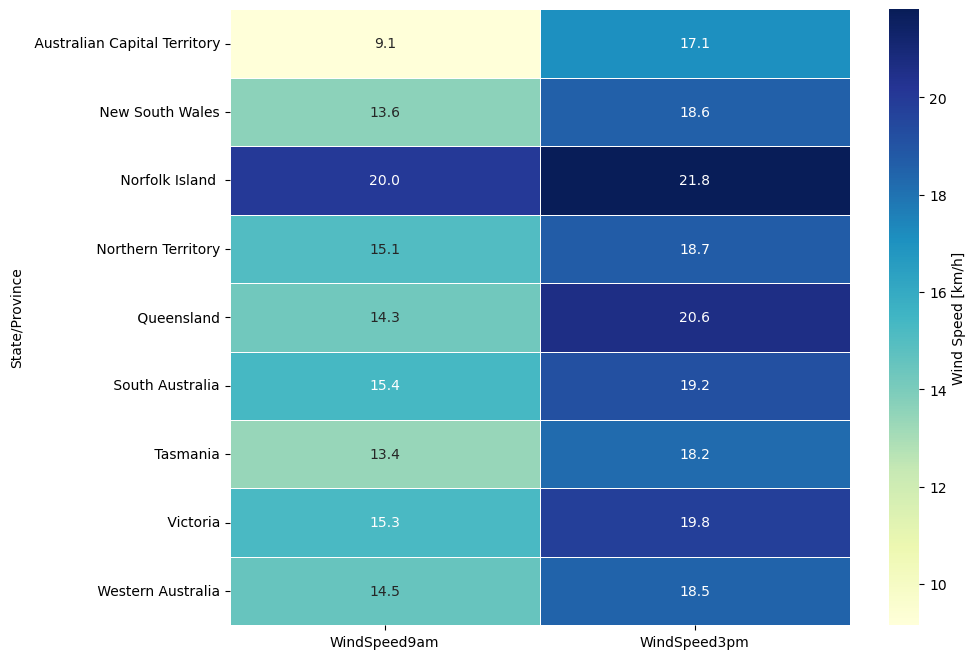

In [25]:
heatmap_data = weather_data.pivot_table(index='State/Province', values=['WindSpeed3pm','WindSpeed9am'])

#Reorder columns
heatmap_data = heatmap_data[['WindSpeed9am', 'WindSpeed3pm']] 

fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, ax=ax,cbar_kws={'label': 'Wind Speed [km/h]'})


plt.show()


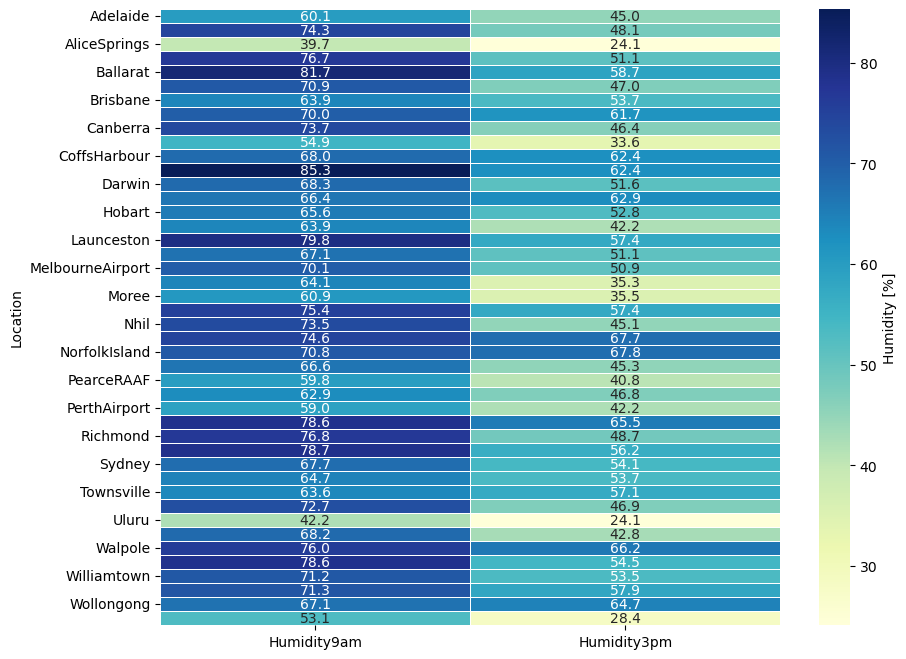

In [26]:
heatmap_data = weather_data.pivot_table(index='Location', values=['Humidity9am','Humidity3pm'])
heatmap_data = heatmap_data[['Humidity9am', 'Humidity3pm']] 

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, ax=ax,cbar_kws={'label': 'Humidity [%]'})

plt.show()

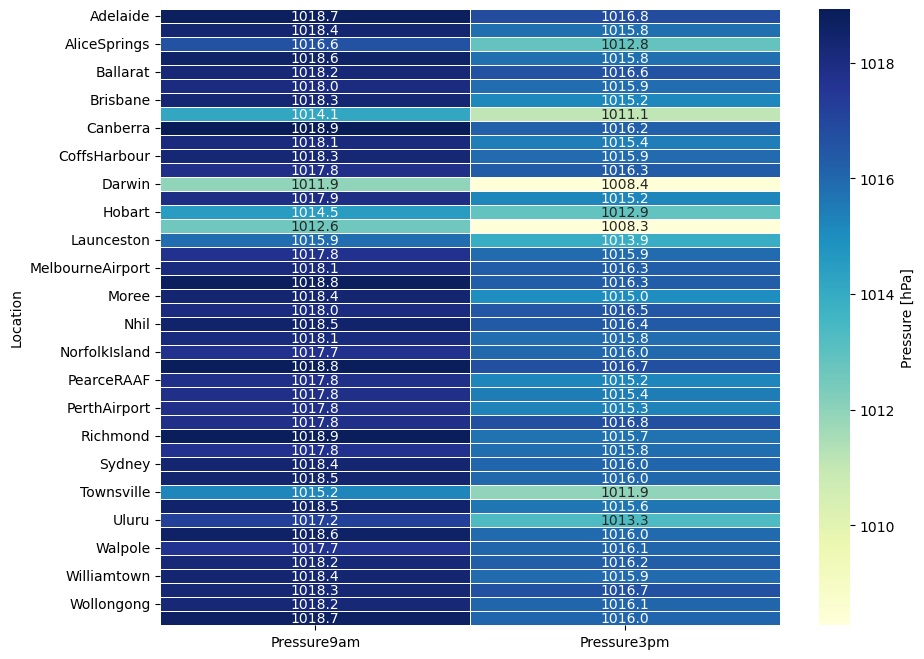

In [27]:
heatmap_data = weather_data.pivot_table(index='Location', values=['Pressure9am','Pressure3pm'])
heatmap_data = heatmap_data[['Pressure9am', 'Pressure3pm']] 

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, ax=ax,cbar_kws={'label': 'Pressure [hPa]'})

plt.show()

## Thesis: the higher humidity, the lower evaporation 
Let's verificate it

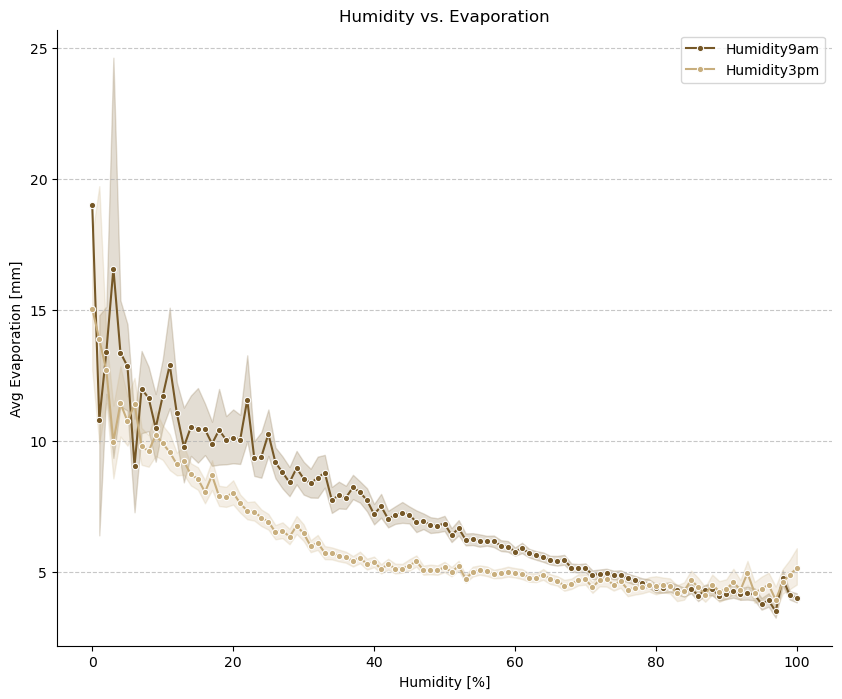

In [28]:
fig,ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=weather_data,  y='Evaporation',x='Humidity9am',marker='o', color='#765827', ax=ax,label='Humidity9am',markersize=4.5)
sns.lineplot(data=weather_data,  y='Evaporation',x='Humidity3pm', marker='o', color='#C8AE7D', ax=ax,label='Humidity3pm',markersize=4.5)

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Humidity vs. Evaporation')
ax.set_ylabel('Avg Evaporation [mm]')
ax.set_xlabel('Humidity [%]')

plt.show()

# if i swap x with y, i get for single value of evaporation multiple data points of humidity
# the area around the line - ci: confidence interval of the mean 95%
# CI - is a range of values that gives you an estimate of where the true population parameter
# (such as a mean, proportion, or other statistic) is likely to fall, based on a sample from that population and a specified level of confidence.
# It is hard to confirm on 100% our thesis, however overall, a negative correlation is visible. Nevertheless there are many 
# amibuous segments, i.e. evaporation decreases at times, then slightly increases and decreases again. Similarly with humidity

## Thesis: When sunshine increases, it generally leads to an increase in evaporation.

In [29]:
sunshine_evaporation = weather_data.groupby('Sunshine')['Evaporation'].mean()
# type(sunshine_evaporation)

In [ ]:
# pd.set_option('display.max_rows',None)
# sunshine_evaporation
# weather_data[weather_data['Sunshine'] == 14.6]['Evaporation']

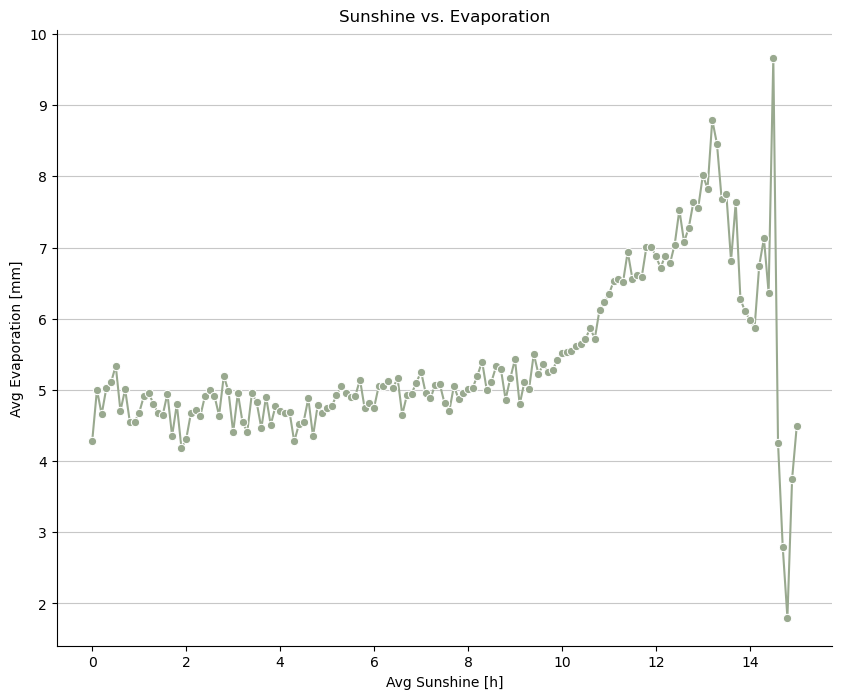

In [30]:
fig,ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=sunshine_evaporation, marker = "o", color="#99A98F",ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis = 'y',linestyle='-',alpha=0.7)

plt.title('Sunshine vs. Evaporation')
ax.set_ylabel('Avg Evaporation [mm]')
ax.set_xlabel('Avg Sunshine [h]')

plt.show()      
# Plot is rather ambiguous, there are many local minima and maxima, the data is very diverse. We cannot explicitly say that if 
# ours of sunshine increase, evaporation too. 

## Rainfall and Max/Min Temperature

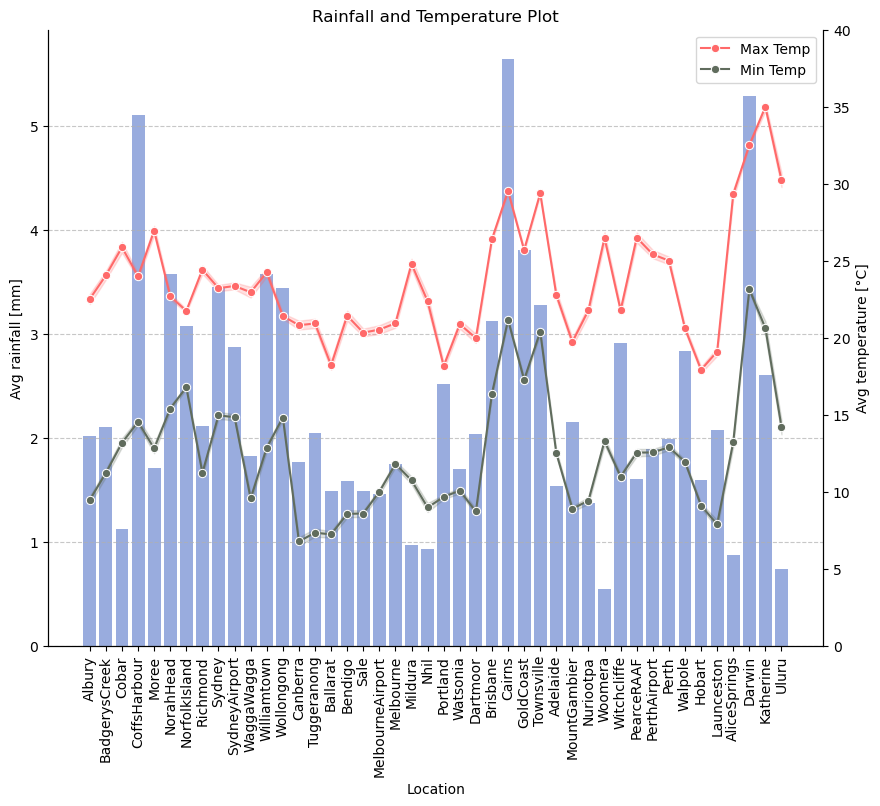

In [31]:
fig,ax1 = plt.subplots(figsize=(10,8))

sns.barplot(data=weather_data, x='Location', y='Rainfall', color='#8EA7E9', ax=ax1, errorbar=None, width=0.8)
ax1.set_ylabel('Avg rainfall [mm]')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

# Create a line plot for Temperature on the right y-axis
ax2 = ax1.twinx()
sns.lineplot(data=weather_data, x='Location', y='MaxTemp', marker='o', color='#FF6969', ax=ax2,label='Max Temp')
sns.lineplot(data=weather_data, x='Location', y='MinTemp', marker='o', color='#606C5D', ax=ax2, label='Min Temp')
ax2.set_ylabel('Avg temperature [°C]')
ax2.set_ylim(0, 40) 

ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.xlabel('Location')
plt.title('Rainfall and Temperature Plot')
plt.xticks(rotation=90)

plt.show()

## All temperatures


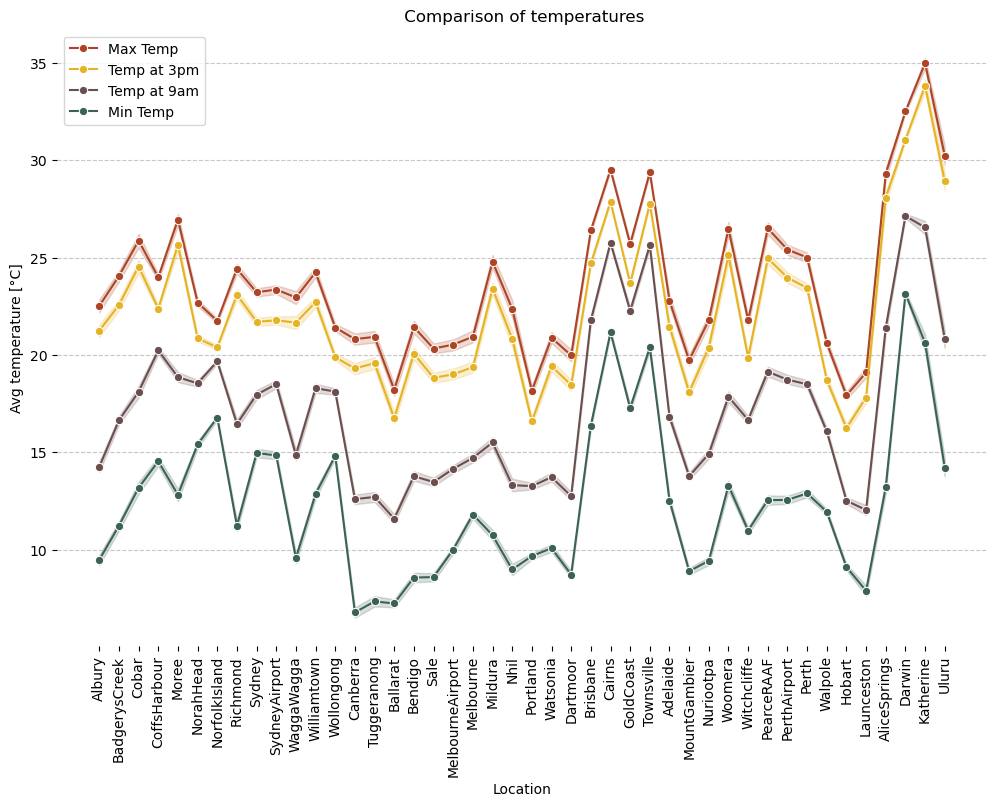

In [32]:
fig,ax = plt.subplots(figsize = (12,8))
sns.lineplot(data=weather_data, x='Location',y='MaxTemp',marker='o',ax=ax,label='Max Temp',color="#AC4425")
sns.lineplot(data=weather_data, x='Location',y='Temp3pm',marker='o',ax=ax,label='Temp at 3pm',color="#E6B325")
sns.lineplot(data=weather_data, x='Location',y='Temp9am',marker='o',ax=ax,label='Temp at 9am',color="#6B4F4F")
sns.lineplot(data=weather_data, x='Location',y='MinTemp',marker='o',ax=ax,label='Min Temp',color="#3C6255")
ax.set_ylabel('Avg temperature [°C]')
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xlabel('Location')
plt.title(' Comparison of temperatures')
plt.xticks(rotation=90)
plt.show()